# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
##Importing Modules##

import os

#For Data manipulationa and wrangling#
import pandas as pd
import numpy as np

#For Data Visualization#
import matplotlib.pyplot as plt
import seaborn as sns

#For processing image data#
import cv2
import random

#For loading image data#
from PIL import Image

#For splitting the dataset#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report



#For building Convolutional Neural Networks#
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#Silence Warnings#
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Specify the path to the folder containing the dataset#
path = '/content/drive/MyDrive/Colab Notebooks'

labels_path = os.path.join(path, 'Labels.csv')
images_path = os.path.join(path, 'images.npy')

print(labels_path)
print(images_path)


#Read in the images#

images = np.load(images_path)
labels = pd.read_csv(labels_path)

print(images.shape)
print(labels.shape)

/content/drive/MyDrive/Colab Notebooks/Labels.csv
/content/drive/MyDrive/Colab Notebooks/images.npy
(4750, 128, 128, 3)
(4750, 1)


## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


Based on our initial look at the data we can observe the following -

1. Our dataset is composed of 4,750 images and we have 4,750 labels that form our target variable that we want to predict.
2. Each of our images are of size 128 x 128
3. We have 3 channeles for each image implying that the images are colored images rather than greyscale ones.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?

*   List item
*   List item


2. Is the dataset provided an imbalance? (Check with using bar plots)

Evaluate random images size by size

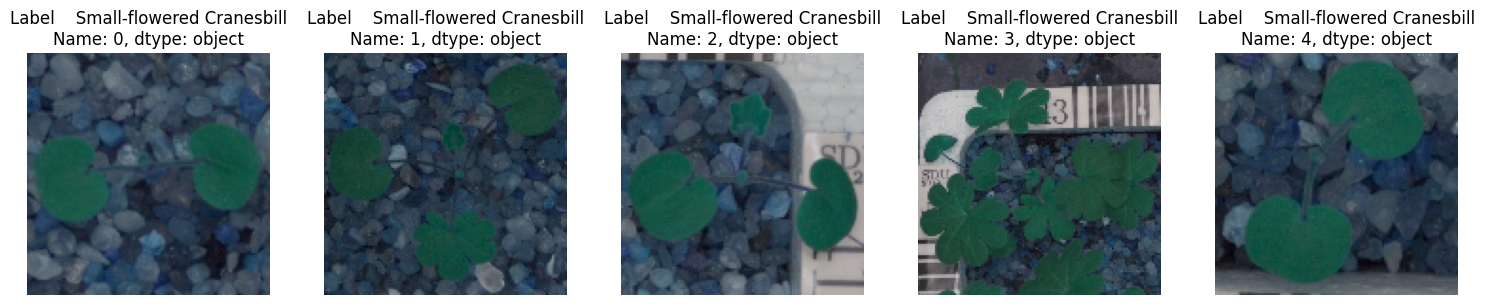

In [ ]:
#Evaluate randomized images in the dataset#
# Verify the path
#print(images_path)  # Print the path to see exactly what it contains
#print(os.path.exists(images_path))  # Check if path exists
#print(os.path.isdir(images_path))   # Check if it's a directory
#print(os.path.isfile(images_path))  # Check if it's a file

#image_cv2 = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)#

# Simple image display function
def show_images(images, labels= labels, num_images=5):
    """
    Quickly display a grid of images

    Parameters:
    - images: NumPy array of images
    - labels: Optional labels (DataFrame or array)
    - num_images: Number of images to display
    """
    # Limit to requested number of images
    images = images[:num_images]

    # Create subplot
    fig, axes = plt.subplots(1, len(images), figsize=(15, 3))

    # Display each image
    for i, img in enumerate(images):
        axes[i].imshow(img)
        axes[i].axis('off')

        # Add label if provided
        if labels is not None:
            axes[i].set_title(str(labels.iloc[i] if isinstance(labels, pd.DataFrame) else labels[i]))

    plt.tight_layout()
    plt.show()

# Basic usage
show_images(images, labels)


We can observe from EDA that each of the images appears to be slightly different. Some images include background details that could clash with identification or add noise to our predictions. The images displayed appear to have different levels of brightness and blurryness that could impact our end results.

Analyze for Class Imbalance

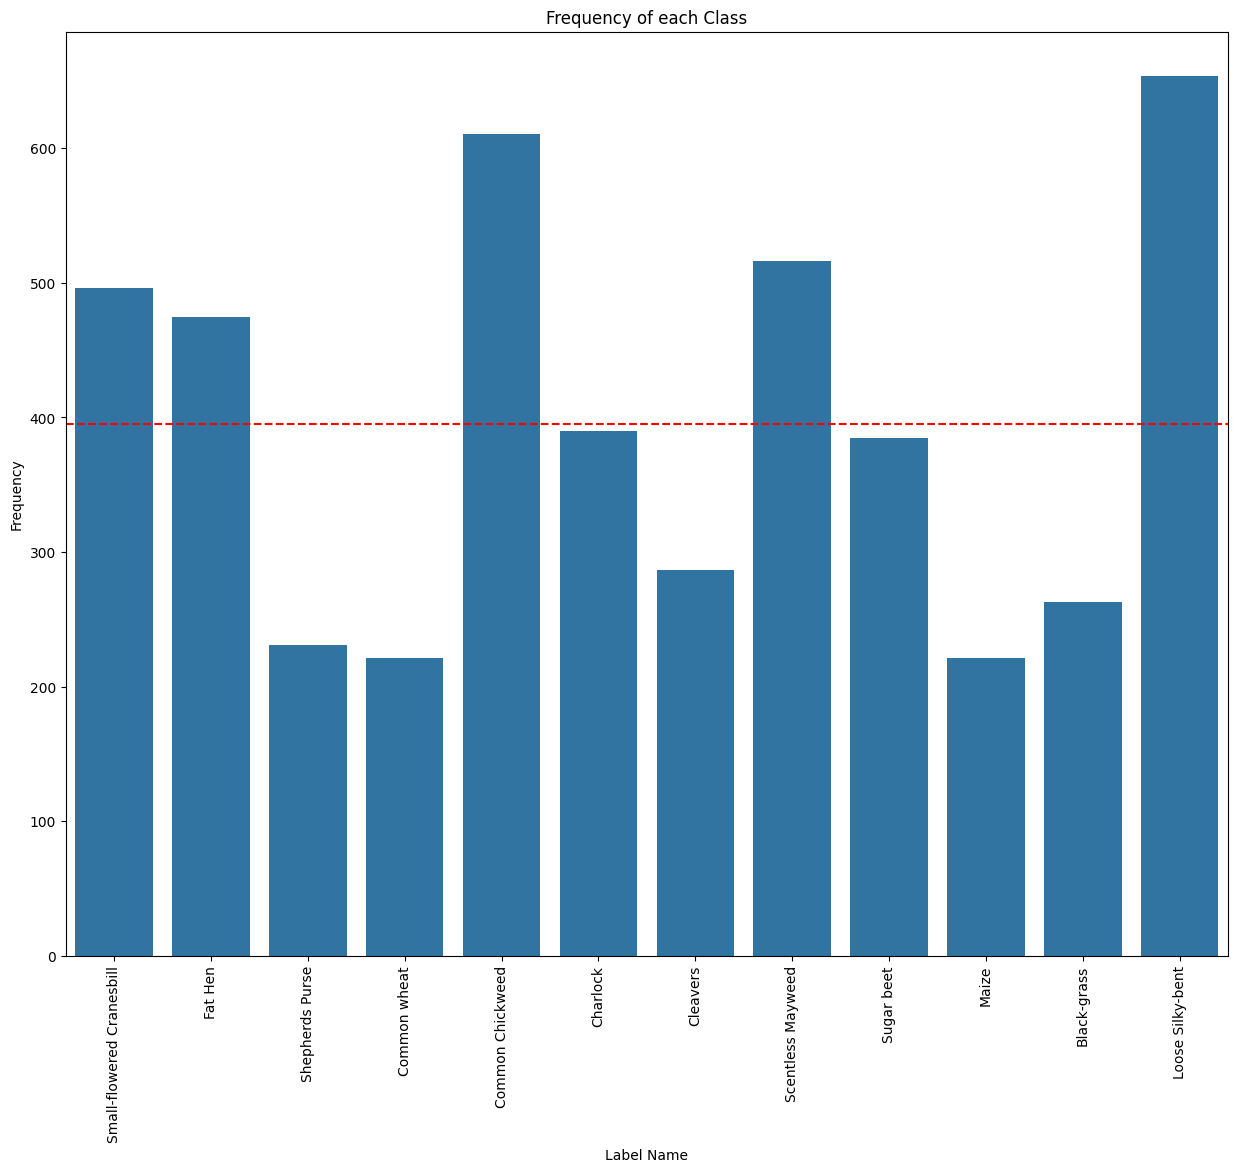

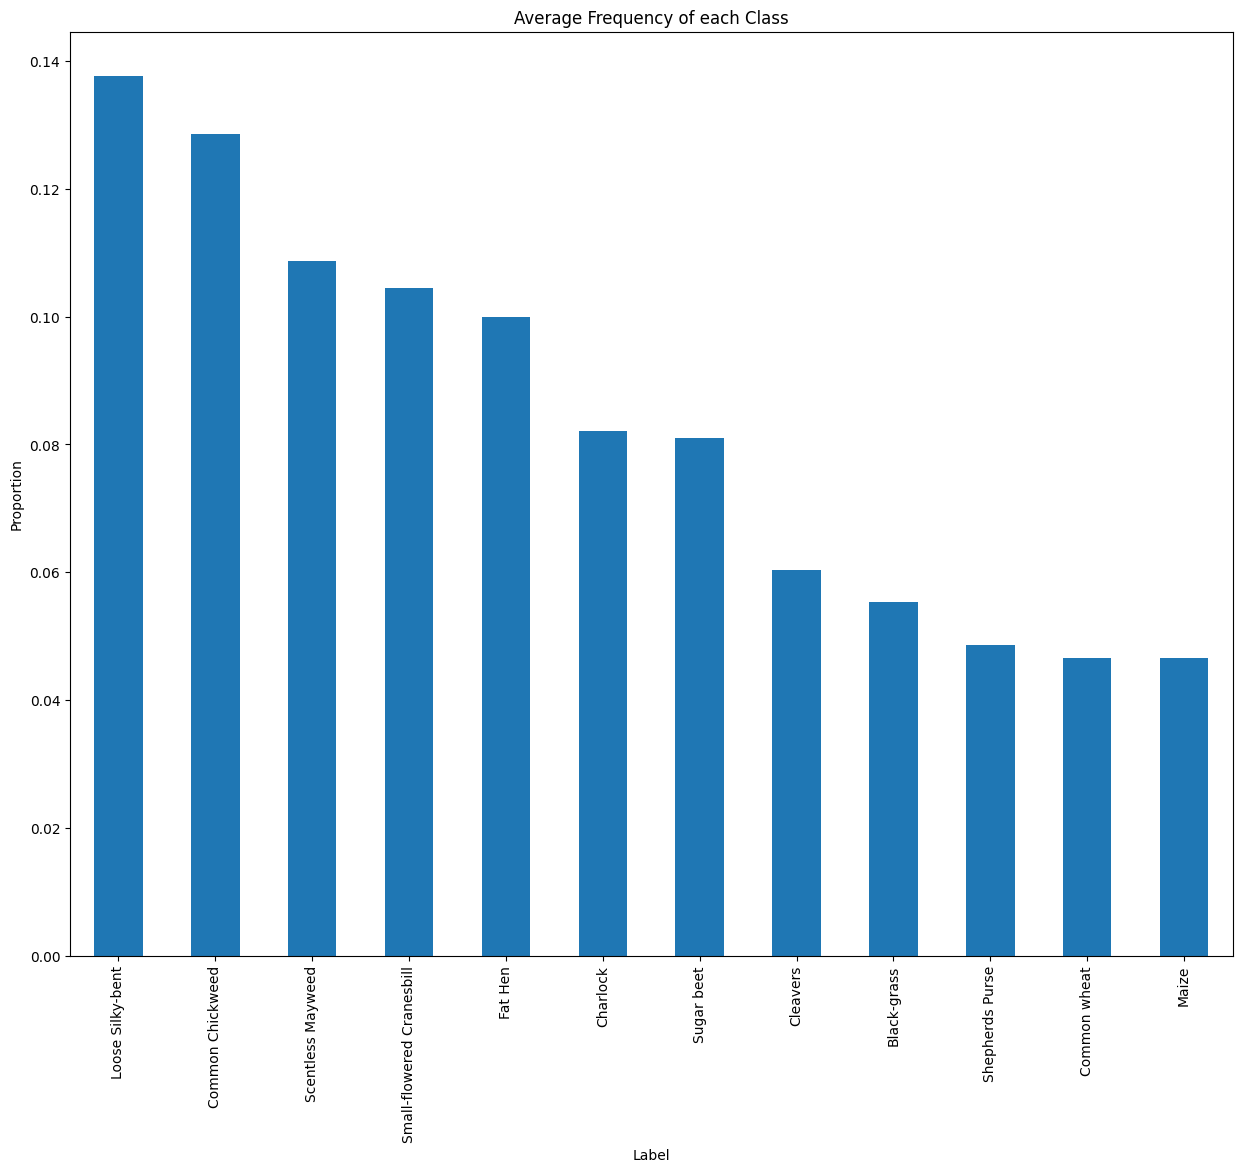

In [ ]:

#Plot a countplot of the labels#
plt.figure(figsize=(15, 12))
sns.countplot(x = 'Label', data = labels)
plt.title('Frequency of each Class')
##Rotate axis labels 90-180 degrees so that the visualization is clearer##
plt.xlabel('Label Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
#Draw a line for visual analysis#
plt.axhline( y = 395, color = 'r', linestyle = '--')
plt.show()

##Avg_frequency#
plt.figure(figsize = (15, 12))
#Calculate the Avg Frequency of each category#
avg_frequency = labels['Label'].value_counts() / len(labels)
#Add a title to the plot#
plt.title('Average Frequency of each Class')
#Plot using a bar plot#
avg_frequency.plot(kind = 'bar')
plt.ylabel('Proportion')

plt.show()


## Data Pre-Processing

### Convert the BGR images to RGB images.

[[[[ 78  52  35]
   [ 76  49  36]
   [ 69  45  31]
   ...
   [114  95  78]
   [110  93  76]
   [109  95  80]]

  [[ 68  46  33]
   [ 73  50  37]
   [ 83  65  48]
   ...
   [113  96  81]
   [105  89  74]
   [109  95  83]]

  [[ 68  50  34]
   [ 72  52  35]
   [101  85  70]
   ...
   [112  97  83]
   [108  94  79]
   [107  94  79]]

  ...

  [[ 69  50  35]
   [ 73  57  42]
   [ 72  57  42]
   ...
   [ 92  76  60]
   [ 97  81  67]
   [ 95  77  64]]

  [[ 67  52  36]
   [ 78  63  48]
   [ 73  57  41]
   ...
   [ 83  66  44]
   [ 91  76  58]
   [ 90  74  57]]

  [[ 70  58  44]
   [ 73  57  43]
   [ 72  55  40]
   ...
   [ 92  70  41]
   [ 97  78  55]
   [ 96  79  61]]]


 [[[ 63  47  30]
   [ 60  50  30]
   [ 63  47  34]
   ...
   [ 74  59  48]
   [ 69  54  42]
   [ 70  56  44]]

  [[ 67  49  30]
   [ 60  47  26]
   [ 61  40  30]
   ...
   [ 76  64  50]
   [ 78  67  52]
   [ 72  56  45]]

  [[ 65  46  23]
   [ 64  48  27]
   [ 59  40  25]
   ...
   [ 81  59  39]
   [ 79  62  47]
   [ 69  54

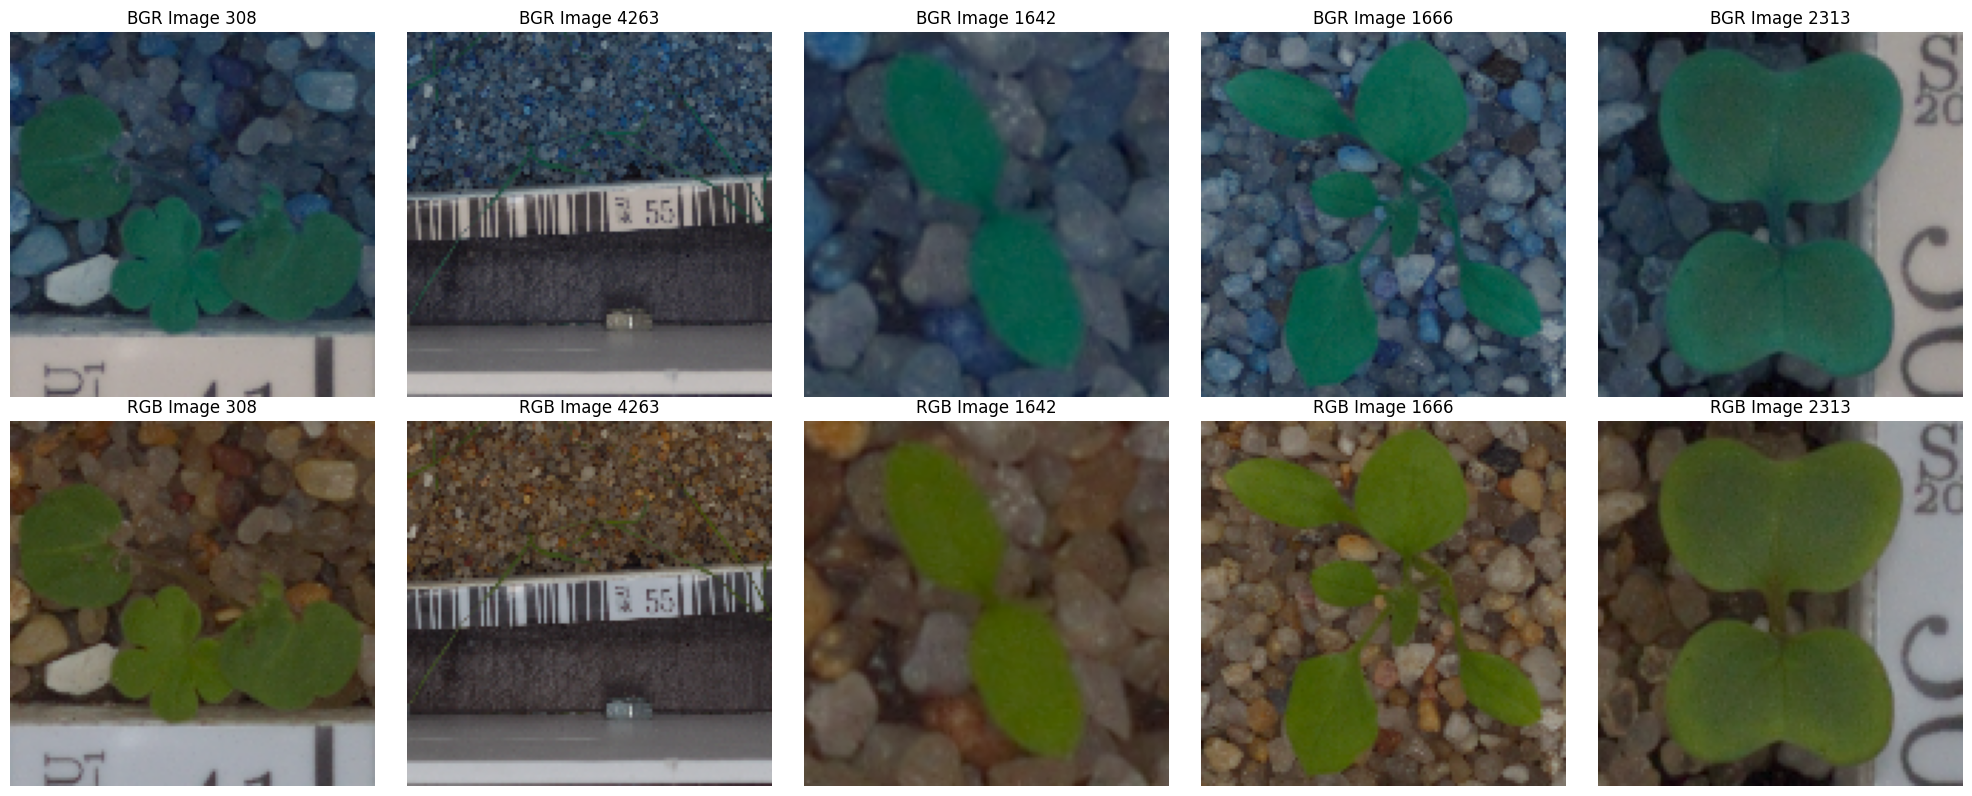

In [ ]:
##Go Back and Watch Vides to remember how to do this correctly##
# Reading Images
# Convert entire dataset from BGR to RGB
bgr_images = images
rgb_images = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in bgr_images]          )

print(rgb_images)

# Validate Conversion
# Randomly select 5 images
selected_indices = np.random.choice(rgb_images.shape[0], size=5, replace=False)


# Create a figure with subplots for the selected images
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, idx in enumerate(selected_indices):
    # Display BGR image
    axes[0, i].imshow(bgr_images[idx])
    axes[0, i].set_title(f'BGR Image {idx}')
    axes[0, i].axis('off')

    # Display RGB image
    axes[1, i].imshow(rgb_images[idx])
    axes[1, i].set_title(f'RGB Image {idx}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


We can observe some challenges with our images here including some images having a light vs a dark background.
We can also observe distracting background noise in almost all of our images.

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

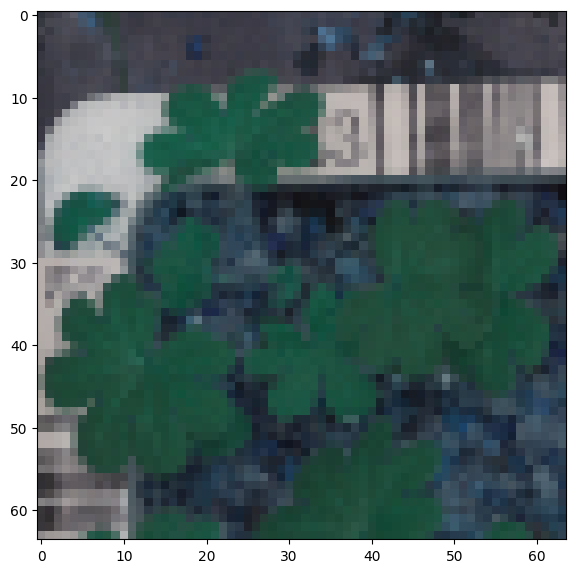

In [ ]:
##We probably don't want to do this avoid a significant drop in our model quality##
#However since its part of the project we will#

#Create an empty list to hold the resized images#
resized_images= []

#Specify the next height and width of images#
height = 64
width = 64

#Specify full dimensions#
dimensions = (height, width)


#Loop through the list of images#
for i in range(len(bgr_images)):
  #Reduce the size of each image#
  resized_image = cv2.resize(bgr_images[i], dimensions, interpolation = cv2.INTER_LINEAR)
  #print(f"Resized Image {i} Shape: {resized_image.shape}")#

  #Append the reduced-size images to the list#
  resized_images.append(resized_image)




#Validate the images has been re-sized using matplotlib#
plt.figure(figsize = (15, 12))
plt.subplot(1, 2, 1)
plt.imshow(resized_images[3])
plt.show()





### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [ ]:
#Split the dataset into training and validation#
X_temp, X_test, y_temp, y_test = train_test_split(np.array(resized_images), labels, test_size=0.2, random_state=42, stratify = labels)



#Split the dataset again#
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify = y_temp)

print(len(X_train))
print(len(X_val))
print(len(y_train))
print(len(y_val))
print(len(X_test))
print(len(y_test))

#Ensure the distribution is similar across training, validation, and test sets#
X_train_dist = pd.DataFrame(y_train['Label'].value_counts(normalize=True))
X_val_dist = pd.DataFrame(y_val['Label'].value_counts(normalize=True))
X_test_dist = pd.DataFrame(y_test['Label'].value_counts(normalize=True))

print("Training Set Distribution:")
print(X_train_dist)

print("\nValidation Set Distribution:")
print(X_val_dist)

print("\nTest Set Distribution:")
print(X_test_dist)

#Check the shape of each of the dataset#
print("Training:")
print(X_train.shape, y_train.shape)
print("Validation:")
print(X_val.shape, y_val.shape)
print("Test:")
print(X_test.shape, y_test.shape)



3040
760
3040
760
950
950
Training Set Distribution:
                           proportion
Label                                
Loose Silky-bent             0.137500
Common Chickweed             0.128618
Scentless Mayweed            0.108553
Small-flowered Cranesbill    0.104605
Fat Hen                      0.100000
Charlock                     0.082237
Sugar beet                   0.080921
Cleavers                     0.060197
Black-grass                  0.055263
Shepherds Purse              0.048684
Maize                        0.046711
Common wheat                 0.046711

Validation Set Distribution:
                           proportion
Label                                
Loose Silky-bent             0.138158
Common Chickweed             0.128947
Scentless Mayweed            0.109211
Small-flowered Cranesbill    0.103947
Fat Hen                      0.100000
Sugar beet                   0.081579
Charlock                     0.081579
Cleavers                     0.060526
Black

This validates that the distribution of image labels has been correctly stratified such that each label has relatively equal representation in each dataset.

### Encode the target labels

In [ ]:
#Encode the labels for the training set#
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train['Label'])
y_val_encoded = encoder.fit_transform(y_val['Label'])
y_test_encoded = encoder.fit_transform(y_test['Label'])

print(y_train_encoded.shape)
print(y_val_encoded.shape)
print(y_test_encoded.shape)

(3040, 12)
(760, 12)
(950, 12)


### Data Normalization

In [ ]:
#Normalize the pixel values to between 0 and 1 by dividing by 255#
X_train_normalized = X_train / 255.0
#Repeat for the validation set#
X_val_normalized = X_val / 255.0
#Repeat for the test set#
X_test_normalized = X_test / 255.0

#Check shape#
print(X_train_normalized.shape)
print(X_val_normalized.shape)
print(X_test_normalized.shape)

#Check minimum value#
print(np.min(X_train_normalized))
print(np.min(X_val_normalized))
print(np.min(X_test_normalized))

#Check maximum value#
print(np.max(X_train_normalized))
print(np.max(X_val_normalized))
print(np.max(X_test_normalized))



(3040, 64, 64, 3)
(760, 64, 64, 3)
(950, 64, 64, 3)
0.0
0.0
0.0
1.0
1.0
1.0


We have now validated that our training, validation, and test sets are normalized between the values of 0 and 1. We have also validated that the stratification was applied such that the distribution of labels is similar across our datasets.

## Model Building

In [ ]:
import random

from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Activation




#Clear the back end to avoid previous work interfering with our project#
tf.keras.backend.clear_session()

#Set the random seed for tf.keras#
#Set the random seed for numpy#
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)


#Initialize a sequential model#
model = Sequential()

#Add a feature extraction layer - Conv2D#
# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), padding = 'same', input_shape = (64, 64, 3) ) )

#Apply Batch Normalization#
#model.add(BatchNormalization())#

#Apply Relu activation
model.add(Activation('relu'))

#Add a pooling layer#
#Use max pooling on a 2x2 matrix, keep padding as same to ensure similar output size#
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#Add a dropout layer if necessary#
#Do not add for now#

#Add a feature extraction layer - layer 2#
#Feature extraction layer 2- 32 filters and kernel size 3x3, padding should be kept 'same' since we don't want to modify the output size#
model.add(Conv2D(32, (3,3), padding = 'same') )

#Apply Batch Normalization#
#model.add(BatchNormalization() )#

#Apply activation function again#
model.add(Activation('relu'))

#Add a pooling layer#
#Use max pooling on a 2x2 matrix, keep padding as same to ensure similar output size#
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))


#Add a dropout layer if necessary#

#Add a flatten layer to flatten all the outputs before pushing to the fully connected neural network layers#
model.add(Flatten() )

#Add dense layers#
model.add(Dense(16, activation='relu'))

#Add the final output layer#
#Use 'softmax' for the activation function because we are doing a multi-class classification#
model.add(Dense(12, activation = 'softmax'))

#Define the optimizer#
optim = tf.keras.optimizers.Adam(learning_rate=0.001)

#Compile the model#
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Examine the model summary#
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │         131,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,548 (591.98 KB)

 Trainable params: 151,548 (591.98 KB)

 Non-trainable params: 0 (0.00 B)

None


Fitting the 1st model

In [ ]:
#Set up iterative learning rate approach using ReduceLRonPlateau#
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.8,
                              patience=3, min_lr=0.00001)

# Setup early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

#Fit the model#
history1 = model.fit(X_train_normalized, y_train_encoded, epochs=50, validation_data=(X_val_normalized, y_val_encoded), batch_size=32, verbose=2, callbacks=[reduce_lr, early_stopping] )

#Evaluate the model#
#model.evaluate(X_test_normalized, y_test_encoded)#

print(history1)

Epoch 1/50
95/95 - 6s - 60ms/step - accuracy: 0.1914 - loss: 2.3595 - val_accuracy: 0.2974 - val_loss: 2.1178 - learning_rate: 0.0010
Epoch 2/50
95/95 - 1s - 6ms/step - accuracy: 0.3401 - loss: 1.9570 - val_accuracy: 0.3763 - val_loss: 1.7933 - learning_rate: 0.0010
Epoch 3/50
95/95 - 1s - 6ms/step - accuracy: 0.3819 - loss: 1.7440 - val_accuracy: 0.3947 - val_loss: 1.6609 - learning_rate: 0.0010
Epoch 4/50
95/95 - 1s - 7ms/step - accuracy: 0.4069 - loss: 1.6269 - val_accuracy: 0.4171 - val_loss: 1.5890 - learning_rate: 0.0010
Epoch 5/50
95/95 - 1s - 6ms/step - accuracy: 0.4405 - loss: 1.5356 - val_accuracy: 0.4329 - val_loss: 1.5376 - learning_rate: 0.0010
Epoch 6/50
95/95 - 1s - 7ms/step - accuracy: 0.4618 - loss: 1.4758 - val_accuracy: 0.4434 - val_loss: 1.5391 - learning_rate: 0.0010
Epoch 7/50
95/95 - 1s - 6ms/step - accuracy: 0.4812 - loss: 1.4042 - val_accuracy: 0.4697 - val_loss: 1.4796 - learning_rate: 0.0010
Epoch 8/50
95/95 - 1s - 6ms/step - accuracy: 0.5079 - loss: 1.3252 -

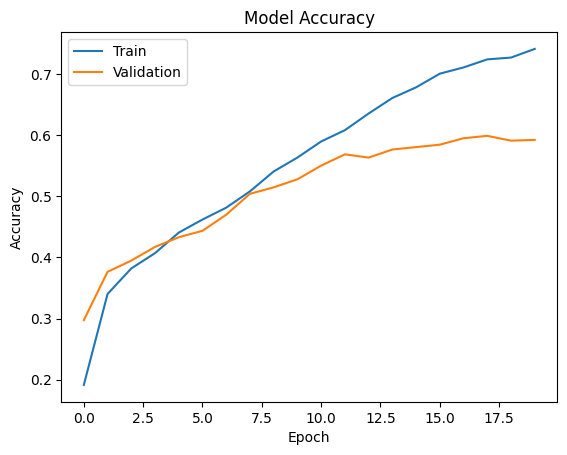

In [ ]:
#Plot the results#
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#Evaluate the model on the test set#
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

print("Testing Set Accuracy Evaluation:")
print(accuracy)

30/30 - 1s - 34ms/step - accuracy: 0.5958 - loss: 1.2467
Testing Set Accuracy Evaluation:
[1.2467018365859985, 0.5957894921302795]


Obtain Probability Predictions for each category in model #1

In [ ]:
y_pred = model.predict(X_test_normalized)
print(y_pred)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
[[1.0508317e-06 1.6147185e-02 1.9059860e-05 ... 2.1526444e-01
  1.9343266e-02 1.6560165e-03]
 [2.4966496e-06 2.7760285e-01 1.6335194e-03 ... 5.2134669e-01
  9.3682922e-02 5.7298802e-03]
 [2.0017952e-09 1.3329226e-03 2.4447041e-07 ... 6.1177272e-02
  1.9447351e-04 2.3987723e-04]
 ...
 [3.6941303e-06 1.6217981e-03 2.3440458e-03 ... 5.5305306e-02
  2.9757815e-05 3.3351627e-01]
 [2.9353282e-07 4.8970507e-04 9.7683915e-05 ... 4.4713706e-02
  1.8062094e-05 8.8167556e-02]
 [1.0967177e-09 1.4681566e-04 3.0431048e-07 ... 2.6634090e-02
  1.5472162e-05 1.7245348e-03]]


Evaluate model performance based on the confusion matrix

tf.Tensor(
[[ 15   0   0   1   1   1  34   0   1   0   0   0]
 [  0  55   2   1   0   0   0   1   7   3   7   2]
 [  0   5  37   0   0   2   1   1   8   0   4   0]
 [  0   0   0  98   0   3   1   4   2   4   9   1]
 [  3   0   2   1   7   1  25   0   4   0   1   0]
 [  1   1   9   4   5  38  17   0   3   3   0  14]
 [ 10   0   1   0   4   1 113   0   1   0   0   1]
 [  0   0   0  17   1   0   0  20   6   0   0   0]
 [  1  13   3   5   2   4   0   4  66   2   0   3]
 [  0   6   1   5   0   2   0   0   8  16   8   0]
 [  0   9   1   3   0   3   1   0   1   5  75   1]
 [  0   1   1   6   1  20   0   0   7   5  10  26]], shape=(12, 12), dtype=int32)


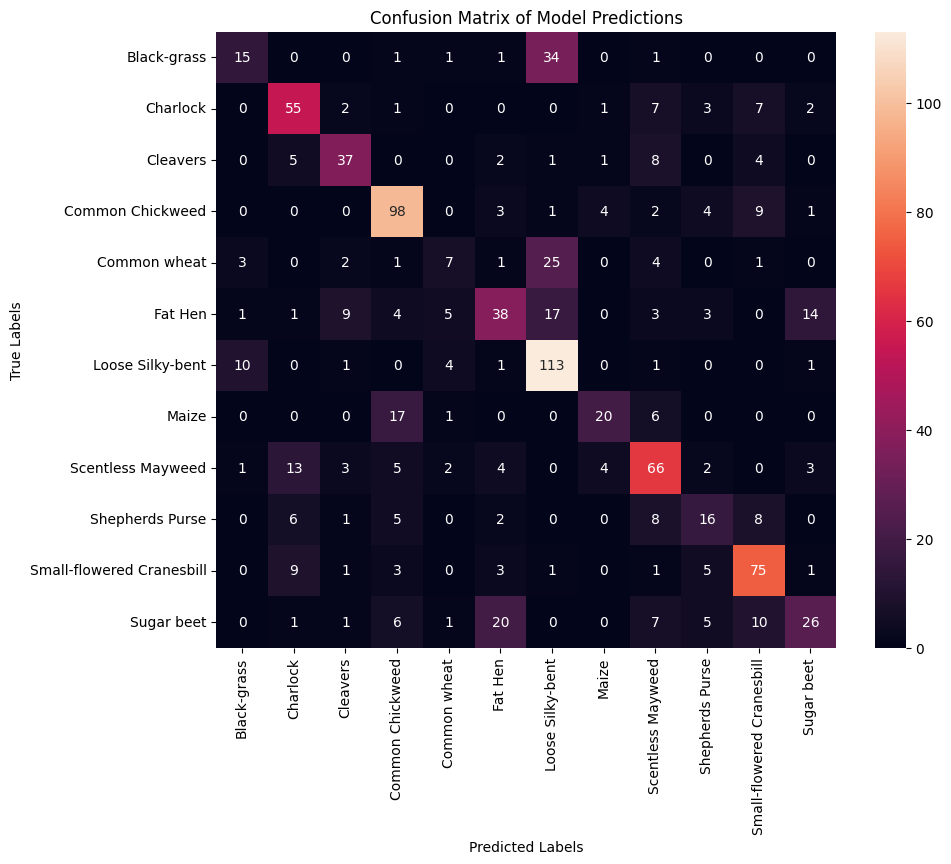

In [ ]:
import math

#Evaluate the model on the confusion matrix#
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

#Create the confusion matrix#
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
print(confusion_matrix)

#Plot the confusion matrix#
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels = encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Model Predictions')
plt.show()




Evaluating the model performance based on the classification report

In [ ]:
#Evaluate the model performance on the classification report#
from sklearn.metrics import classification_report  # Make sure it's imported


# Evaluate the model performance on the classification report
test_classification = classification_report(y_test_arg, y_pred_arg, target_names=encoder.classes_)
print(test_classification)

                           precision    recall  f1-score   support

              Black-grass       0.50      0.28      0.36        53
                 Charlock       0.61      0.71      0.65        78
                 Cleavers       0.65      0.64      0.64        58
         Common Chickweed       0.70      0.80      0.75       122
             Common wheat       0.33      0.16      0.22        44
                  Fat Hen       0.51      0.40      0.45        95
         Loose Silky-bent       0.59      0.86      0.70       131
                    Maize       0.67      0.45      0.54        44
        Scentless Mayweed       0.58      0.64      0.61       103
          Shepherds Purse       0.42      0.35      0.38        46
Small-flowered Cranesbill       0.66      0.76      0.70        99
               Sugar beet       0.54      0.34      0.42        77

                 accuracy                           0.60       950
                macro avg       0.56      0.53      0.53    

Based on our first model we can observe a few key findings:

1. Our overall accuracy on test is only 61% which is pretty low.
2. The model does the best job at correctly classifying the "Loose Silky-bent" and the "Common Chickweed". Both classes were part of the majority classes which explains the models ability to successfully predict these classes.
3. The model does the worst job at correctly classifying the Black-grass and the Common Wheat- both of these classes were part of the minority class which explains why the model struggles to correctly predict these.

4. Data Augmentation should help us improve our performance significantly.

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

To mitigate overfitting we will use data augmentation to prevent our model from becoming overly sensitive to placement within images, and be able to properly identify the object even if its flipped, rotated, etc...
This will increase the diversity of images the model is trained with and should improve generalizability.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#Instantiate training data generation#
# Create an instance of ImageDataGenerator with desired augmentations
train_datagen = ImageDataGenerator(
    rotation_range=40,     # Random rotations between 0 and 40 degrees
    width_shift_range=0.1, # Fraction of total width for horizontal shift
    height_shift_range=0.1,# Fraction of total height for vertical shift
    horizontal_flip=True,  # Randomly flip inputs horizontally
    vertical_flip=False,    # Randomly flip inputs vertically
    #brightness_range=[0.5, 1.5],  # Randomly change brightness (1 is no change)
    #channel_shift_range=150.0,  # Randomly shift color channels

    fill_mode='nearest'    # Strategy for filling newly created pixels
)

#Set up training generation#
# Setup the training data generator
train_generator = train_datagen.flow(
    X_train_normalized,     # Input data
    y_train_encoded,     # Labels for input data
    batch_size=32      # Size of batches to produce
)

#print(train_generator)#

In [ ]:

from keras.layers import SpatialDropout2D
import random

from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Activation
from keras.initializers import HeNormal


#Clear the keras backend#
tf.keras.backend.clear_session()

#Set random seed for keras, numpy, and random modules#
random.seed(43)
np.random.seed(43)
tf.random.set_seed(43)


# Initialize the HeNormal object
he_normal = HeNormal()

#Instantiate the model#
model2 = Sequential()

#Add a convolutional layer for feature extraction#
model2.add(Conv2D(128, (3,3), padding='same', input_shape=(64,64,3), kernel_initializer=he_normal))

#Apply Batch Normalization#
#model2.add(BatchNormalization())#

#Apply activation function#
model2.add(Activation('relu'))


#Consider adding spatial dropout if required here#
#model2.add(SpatialDropout2D(0.05))#  # Apply Spatial Dropout of 5%#

#Add a Max pooling layer for simplification#
#This reduces the size of the output to the next layer#
model2.add(MaxPooling2D(pool_size=(2,2), padding = 'same'))

#Add a 2nd convolutional layer#
model2.add(Conv2D(64, (3,3), padding='same', input_shape=(64,64,3), kernel_initializer=he_normal))

#Apply Batch Normalization#

#model2.add(BatchNormalization())#

model2.add(Activation('relu'))

#Implement dropout here if required#
#model2.add(SpatialDropout2D(0.15))# #Dropout 15% of the neurons randomly to prevent overfitting here#

#Add a Max pooling layer for simplification#
model2.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#Add a final convolutional layer for extraction of complex features#
model2.add(Conv2D(64, (3,3), padding='same', input_shape=(64, 64, 3), kernel_initializer=he_normal))

#Apply Batch Normalization#
#model2.add(BatchNormalization())#

model2.add(Activation('relu'))

#Consider adding spatial dropout if required here#

#model2.add(SpatialDropout2D(0.2))#  # Apply Spatial Dropout of 30% here#


#Add a final max pooling layer#
model2.add(MaxPooling2D(pool_size=(2,2), padding='same'))


#Add a flatten layer#
model2.add(Flatten())

#Add a full connected layer#
model2.add(Dense(16, activation='relu'))

#Add an output layer#
model2.add(Dense(12, activation='softmax'))


#Specify the parameters for the model#
optim = tf.keras.optimizers.Adam(learning_rate=0.005)

#Compile the model#
model2.compile(optimizer = optim, loss='categorical_crossentropy', metrics=['accuracy'])

#Set up ReduceLRonPlateau#
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, min_lr=0.00001)

#Setup early stopping#
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10)



print(model2.summary())

#Evaluate performance#


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          65,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 180,060 (703.36 KB)

 Trainable params: 180,060 (703.36 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#Fit the 2nd model#
# Train the model
history2 = model2.fit(train_generator,

                         epochs = 100,
                         validation_data = (X_val_normalized, y_val_encoded),
                         verbose=2,
                         callbacks=[reduce_lr, early_stopping]

                        )

print(history2)


Epoch 1/100
95/95 - 10s - 101ms/step - accuracy: 0.1309 - loss: 2.5328 - val_accuracy: 0.1382 - val_loss: 2.4393 - learning_rate: 0.0050
Epoch 2/100
95/95 - 4s - 42ms/step - accuracy: 0.1382 - loss: 2.4225 - val_accuracy: 0.1368 - val_loss: 2.4212 - learning_rate: 0.0050
Epoch 3/100
95/95 - 5s - 55ms/step - accuracy: 0.1428 - loss: 2.4155 - val_accuracy: 0.1408 - val_loss: 2.3886 - learning_rate: 0.0050
Epoch 4/100
95/95 - 5s - 57ms/step - accuracy: 0.1898 - loss: 2.3625 - val_accuracy: 0.2118 - val_loss: 2.2468 - learning_rate: 0.0050
Epoch 5/100
95/95 - 9s - 95ms/step - accuracy: 0.2332 - loss: 2.1300 - val_accuracy: 0.2434 - val_loss: 2.1184 - learning_rate: 0.0050
Epoch 6/100
95/95 - 5s - 56ms/step - accuracy: 0.3049 - loss: 2.0329 - val_accuracy: 0.3053 - val_loss: 2.0070 - learning_rate: 0.0050
Epoch 7/100
95/95 - 4s - 42ms/step - accuracy: 0.3385 - loss: 1.9174 - val_accuracy: 0.3342 - val_loss: 1.8379 - learning_rate: 0.0050
Epoch 8/100
95/95 - 6s - 62ms/step - accuracy: 0.3497

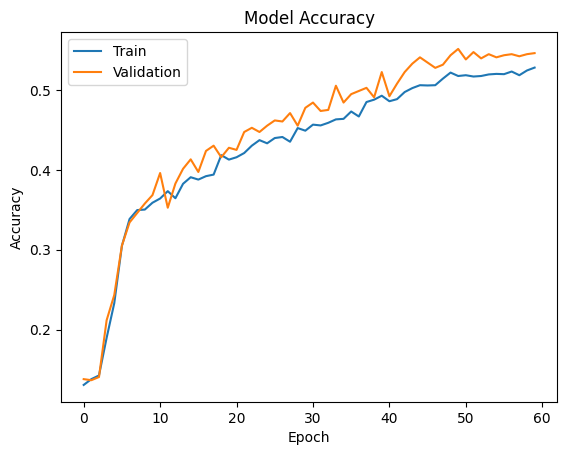

In [ ]:
#Plot the results#
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
#Evaluate final model on the test set#
#Evaluate the model on the test set#
accuracy2 = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

print("Testing Set Accuracy Evaluation:")
print(accuracy2)

#Retrieve predictions on the test set#
y_pred = model2.predict(X_test_normalized)
print(y_pred)

#Retrieve the maximum prediction on the encoded target#
y_test_arg = np.argmax(y_test_encoded, axis=1)
y_pred_arg = np.argmax(y_pred, axis=1)

##Develop the confusion matrix#
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
print(confusion_matrix)

30/30 - 1s - 29ms/step - accuracy: 0.5516 - loss: 1.2831
Testing Set Accuracy Evaluation:
[1.2830533981323242, 0.551578938961029]
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
[[2.85169203e-02 4.17362382e-16 1.03195319e-09 ... 4.69428983e-07
  2.41492667e-17 1.18663258e-04]
 [2.18998190e-04 4.26236898e-01 1.31450832e-01 ... 1.59702841e-02
  3.37493360e-01 1.86569393e-02]
 [2.56816391e-03 1.39228278e-03 2.86525604e-03 ... 6.10130168e-02
  4.46807790e-05 2.59274896e-02]
 ...
 [2.10563978e-03 8.22446961e-03 7.40032177e-03 ... 1.12686306e-01
  2.83626519e-04 3.48938145e-02]
 [3.10134841e-03 1.03441489e-04 6.84626808e-04 ... 2.34074984e-02
  2.99895032e-06 1.55520616e-02]
 [2.95412098e-03 2.27334196e-04 1.06000737e-03 ... 3.14449370e-02
  6.79465802e-06 1.82720236e-02]]
tf.Tensor(
[[  0   0   0   0   0   1  52   0   0   0   0   0]
 [  0  66   0   2   0   1   0   0   3   0   6   0]
 [  0   6   8   3   0  17   0   0   6   0  18   0]
 [  0   8   0 104   0   1   1   1   6   1   0   0]
 [  0   0   1  

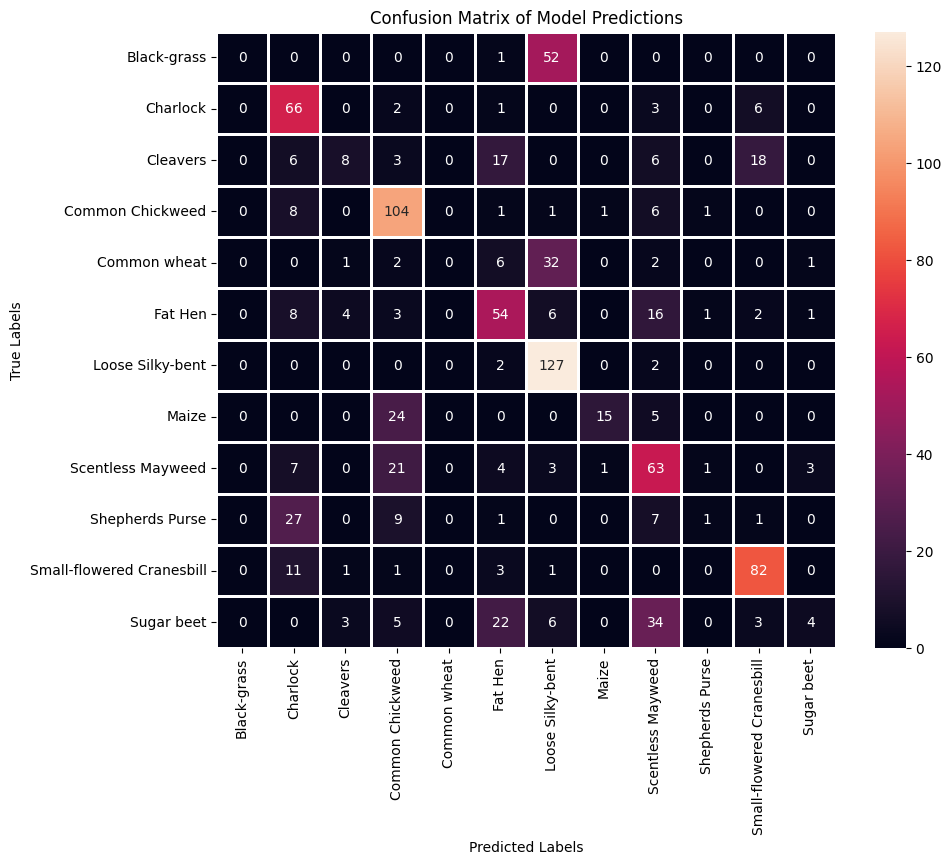

In [ ]:
##Plot full confusion matrix if not completed above#
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', linewidths=1, xticklabels=encoder.classes_, yticklabels = encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Model Predictions')
plt.show()


Our 2nd model obtained 55.16% accuracy on the test set. This is still fairly low and disappointing however the performance generalizes significantly more smoothly compared the the first model.

In [ ]:
#Analyze the test classification report on the final model#
test_classification = classification_report(y_test_arg, y_pred_arg, target_names=encoder.classes_)
print(test_classification)

                           precision    recall  f1-score   support

              Black-grass       0.00      0.00      0.00        53
                 Charlock       0.50      0.85      0.63        78
                 Cleavers       0.47      0.14      0.21        58
         Common Chickweed       0.60      0.85      0.70       122
             Common wheat       0.00      0.00      0.00        44
                  Fat Hen       0.48      0.57      0.52        95
         Loose Silky-bent       0.56      0.97      0.71       131
                    Maize       0.88      0.34      0.49        44
        Scentless Mayweed       0.44      0.61      0.51       103
          Shepherds Purse       0.25      0.02      0.04        46
Small-flowered Cranesbill       0.73      0.83      0.78        99
               Sugar beet       0.44      0.05      0.09        77

                 accuracy                           0.55       950
                macro avg       0.45      0.44      0.39    

In [ ]:
#Show both models side by side and evaluate which one to choose#

model1_history = history1.history
mode12_history = history2.history

train_acc1 = model1_history['accuracy']
val_acc1 = model1_history['val_accuracy']
test_acc1 = accuracy[1]

train_acc2 = mode12_history['accuracy']
val_acc2 = mode12_history['val_accuracy']
test_acc2 = accuracy2[1]

"""Analyze the first model"""
#Create a dictionary containing the performance details from the first model#
model1_perf = {
    'Training Accuracy' : max(train_acc1),
    'Validation Accuracy': max(val_acc1),
    'Test Accuracy': test_acc1
}

#Create a dictionary containing the performance details from the second model#
model2_perf = {
    'Training Accuracy' : max(train_acc2),
    'Validation Accuracy': max(val_acc2),
    'Test Accuracy': test_acc2
}

print("Model 1 Performance:")
print(model1_perf)

print("Model 2 Performance:")
print(model2_perf)


#Combine into a single dataframe#
perf_df = pd.DataFrame([model1_perf, model2_perf], index=['Model 1', 'Model 2'])

#Display the dataframe#
print(perf_df)

Model 1 Performance:
{'Training Accuracy': 0.7407894730567932, 'Validation Accuracy': 0.5986841917037964, 'Test Accuracy': 0.5957894921302795}
Model 2 Performance:
{'Training Accuracy': 0.5279605388641357, 'Validation Accuracy': 0.5513157844543457, 'Test Accuracy': 0.551578938961029}
         Training Accuracy  Validation Accuracy  Test Accuracy
Model 1           0.740789             0.598684       0.595789
Model 2           0.527961             0.551316       0.551579


I choose model #2 the CNN built with data augmentation because although the 2nd model is probably underfit, its clear its performance generalizes well.

-This model could be enhanced by applying SMOTE/over-sampling techniques to handle minority class predictions better.
-With greater time, and GPU capacity we could also probably build a more complex model as the second model appears to be underfit.

-You could equally make an argument for model #1 due to better performance on validation/test set. However, this model is clearly overfit.


## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

Comments on Model Performance Comparison

In [ ]:
final_model = model
print(final_model.summary() )



### Visualizing the prediction

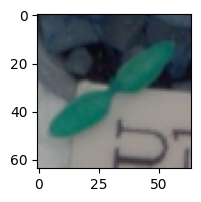

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


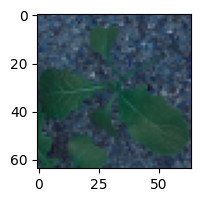

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Label ['Charlock']
True Label Charlock


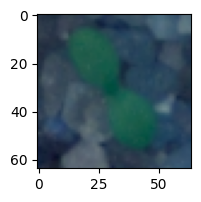

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Label ['Scentless Mayweed']
True Label Scentless Mayweed


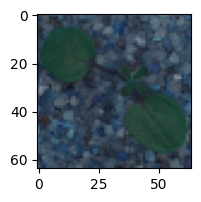

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Cleavers


In [ ]:
#Visualize the confusion matrix#
#Visualize the images#
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', encoder.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', encoder.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', encoder.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', encoder.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
print('Predicted Label', encoder.inverse_transform(model2.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', encoder.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', encoder.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', encoder.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations

*While model performance is fairly disappointing this model is still able to significantly reduce the labor involved in agriculture by correctly classifying ~60% of the images correctly.
-Our model classifies the majority classes well especially the Loose Silky-bent, Common Chickweed, and Charlock. More than 85% of their images were correctly classified
-Our model fails to successfully classify many of the images in the minority class. The worst performance is on the Black-grass and common wheat. Our model frequently confuses the correct image labels and mis-classifies these.

My recommendations for improve would be as follows:
1. Gathering additional data on the minority classes to provide more images for training
2. Perform SMOTE/over-sampling and evaluate how this impacts predictive power in the minority classes
3. Consider adding more Convolutional layers to the 2nd model

_____